<a href="https://colab.research.google.com/github/yuweiyang223/Improving-IT-service-delivery-to-federal-departments/blob/main/CanDev_SSC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Gathering

In [1]:
# data gathering and rendering
import pandas as pd
import numpy as np
# upload from local device
from google.colab import files
import io
# ignore warnings
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import plotly.express as px


In [2]:
def plot_hist_log(feature_name,ticks,bins,df):

    '''
    feature_name : a string for column's name in a data frame.
    ticks        : a list of numbers for x-axis values in the histogram.
    bins         : histogram number of bins.
    df            : The data frame.

    '''
    labels=['{}'.format(v) for v in ticks]
    df[feature_name].hist( bins=bins);
    plt.xscale('log')
    plt.xticks(ticks,labels);
def graph_labels(x_label,y_label,title):

    '''
    x_label : a string input for x label.
    y_label : a string input for ylabel.
    title   :  a string input for title.
    '''
    plt.figure(figsize=(15,7))
    plt.title(title,fontsize=20)
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel(y_label,fontsize=14)

        

In [3]:
drive.mount('/content/gdrive')
inc_hist=pd.read_csv('gdrive/MyDrive/CanDev-SCC/INCIDENT_HISTORY.csv')
inc_own=pd.read_csv('gdrive/MyDrive/CanDev-SCC/INCIDENT_OWNER_HISTORY.csv')
inc=pd.read_csv('gdrive/MyDrive/CanDev-SCC/INCIDENTS.csv')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Data Cleaning

In [4]:
inc_hist.drop_duplicates(inplace=True)
#df1.dropna(inplace=True)
inc_own.drop_duplicates(inplace=True)
#df2.dropna(inplace=True)
inc.drop_duplicates(inplace=True)
#df3.dropna(inplace=True)

In [5]:
inc_hist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1080393 entries, 0 to 1083996
Data columns (total 4 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   ticket_nmbr         1080393 non-null  object 
 1   STATUS              1080393 non-null  object 
 2   change_date         1002956 non-null  object 
 3   TIME_IN_STATUS_HRS  815479 non-null   float64
dtypes: float64(1), object(3)
memory usage: 41.2+ MB


In [6]:
inc_own.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1150266 entries, 0 to 1152408
Data columns (total 7 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   ticket_nmbr                  1150266 non-null  object 
 1   STATUS                       1150266 non-null  object 
 2   assigned_group               990706 non-null   object 
 3   PARENT_SERVICE               990416 non-null   object 
 4   service                      990628 non-null   object 
 5   CHANGE_DATE                  1062090 non-null  object 
 6   TIME_IN_STATUS_BY_OWNER_HRS  738608 non-null   float64
dtypes: float64(1), object(6)
memory usage: 70.2+ MB


In [7]:
inc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226296 entries, 0 to 226295
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   TICKET_NMBR              226296 non-null  object 
 1   PARENT_SERVICE           225548 non-null  object 
 2   service                  226296 non-null  object 
 3   org_id                   225451 non-null  float64
 4   ASSIGNED_GROUP           225395 non-null  object 
 5   OPEN_DATE                226296 non-null  object 
 6   CLOSE_DATE               225276 non-null  object 
 7   PRIORITY                 226296 non-null  object 
 8   STATUS                   226296 non-null  object 
 9   ACTUAL_COMPLETION_HRS    225276 non-null  float64
 10  BUSINESS_COMPLETION_HRS  225276 non-null  float64
 11  AGING                    1020 non-null    float64
 12  CLASS_STRUCTURE_ID       209348 non-null  object 
 13  class_structure          208664 non-null  object 
 14  CLAS

In [8]:
inc_hist.head()

,ticket_nmbr,STATUS,change_date,TIME_IN_STATUS_HRS
0,IN10028612,QUEUED,01APR2016:00:03:12,8.383333
1,IN10028612,RESOLVED,01APR2016:08:26:30,0.000000
2,IN10028612,CLOSED,12APR2016:05:30:11,NaN
3,IN10028613,QUEUED,01APR2016:01:04:45,64.100000
4,IN10028613,RESOLVED,11APR2016:11:06:12,0.000000


In [9]:
inc_own.head()


,ticket_nmbr,STATUS,assigned_group,PARENT_SERVICE,service,CHANGE_DATE,TIME_IN_STATUS_BY_OWNER_HRS
0,IN10028612,QUEUED,DC000152,Middleware,Middleware,01APR2016:00:03:12,8.383333
1,IN10028612,RESOLVED,DC000152,Middleware,Middleware,01APR2016:08:26:30,0.000000
2,IN10028612,CLOSED,DC000152,Middleware,Middleware,12APR2016:05:30:11,NaN
3,IN10028613,QUEUED,NDS00032,Midrange,Midrange - Windows -X86,01APR2016:01:04:45,64.100000
4,IN10028613,RESOLVED,NDS00032,Midrange,Midrange - Windows -X86,11APR2016:11:06:12,0.000000


In [10]:
inc.head()

,TICKET_NMBR,PARENT_SERVICE,service,org_id,ASSIGNED_GROUP,OPEN_DATE,CLOSE_DATE,PRIORITY,STATUS,ACTUAL_COMPLETION_HRS,BUSINESS_COMPLETION_HRS,AGING,CLASS_STRUCTURE_ID,class_structure,CLASSIFICATION_ID,classification,EXTERNAL_SYSTEM,GLOBAL_TICKET_ID,CLOSURE_CODE,LAST_MODIFIED_DATE
0,IN10028612,Middleware,Middleware,1342.0,DC000152,01APR2016:00:01:16,01APR2016:08:26:30,Low,CLOSED,8.42,1.43,NaN,2101,IT Issue \ Hardware,2101,Hardware Issue,EVENTMANAGEMENT,NaN,OTH,12APR2016:05:30:11
1,IN10028613,Midrange,Midrange - Windows -X86,1342.0,NDS00032,01APR2016:00:35:21,11APR2016:11:06:12,Low,CLOSED,250.51,64.10,NaN,21,IT Issue,21,IT Issue,EVENTMANAGEMENT,NaN,CIS,22APR2016:05:30:33
2,IN10028614,Mainframe,Mainframe,1065.0,DC000155,01APR2016:01:43:26,01APR2016:10:28:51,Low,CLOSED,8.76,3.47,NaN,3102,IT Request \ Software Request,3102,Software Request,CREATEDFROMSR,NaN,SUP,12APR2016:05:30:09
3,IN10028615,High-performance Computing,High-performance Computing,1342.0,DC000133,01APR2016:02:57:00,01APR2016:07:42:08,Low,CLOSED,4.75,0.70,NaN,3102,IT Request \ Software Request,3102,Software Request,EVENTMANAGEMENT,NaN,OSD,12APR2016:05:30:10
4,IN10028616,NaN,-1,1342.0,NaN,01APR2016:05:21:02,01APR2016:05:23:39,Low,CLOSED,0.04,0.00,NaN,2103,IT Issue \ Networks,2103,Networks Issue,PHONECALL,NaN,AUT,11APR2016:05:30:07


# 1. Average time that incidents spend in a particular status.

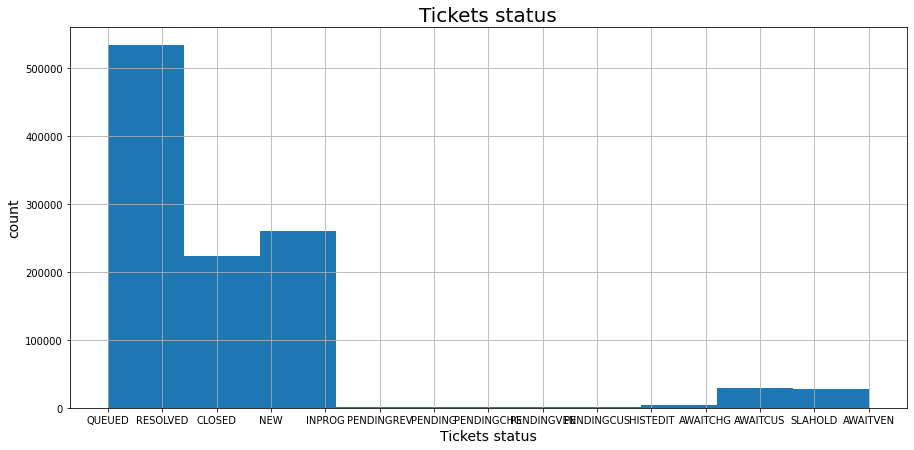

In [11]:
graph_labels('Tickets status','count',"Tickets status")
inc_hist['STATUS'].hist();

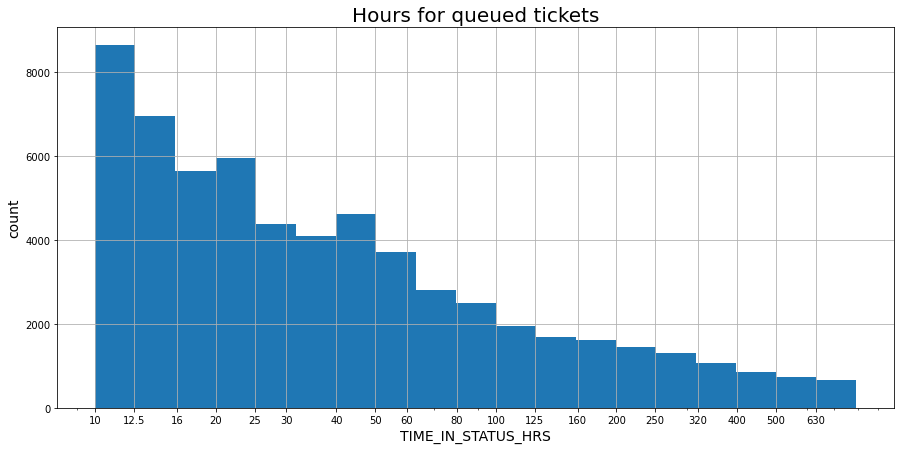

In [12]:
graph_labels('TIME_IN_STATUS_HRS','count',"Hours for queued tickets")
ticks=[10,12.5,16,20,25,30,40,50,60,80,100,125,160,200,250,320,400,500,630]
bins= 10**np.arange(1,3,0.1)
plot_hist_log('TIME_IN_STATUS_HRS',ticks,bins,inc_hist[inc_hist['STATUS']=="QUEUED"])


In [13]:
inc_hist[inc_hist['STATUS']=="QUEUED"]['TIME_IN_STATUS_HRS'].mean()

24.71588358210574

# 2. Number of times an incident is reassigned during the life of the ticket.

In [14]:
time_reassigned = inc_own[['ticket_nmbr','assigned_group']].value_counts().reset_index(name='counts')
time_reassigned


,ticket_nmbr,assigned_group,counts
0,IN10226326,ESI00011,23
1,IN10202380,ENT00005,18
2,IN10249814,ESI00011,18
3,IN10208946,NW000412,17
4,IN10180325,EDC00010,16
...,...,...,...
312628,IN10092377,EDC00053,1
312629,IN10092378,EDC00006,1
312630,IN10092385,DC000163,1
312631,IN10092387,NW000405,1


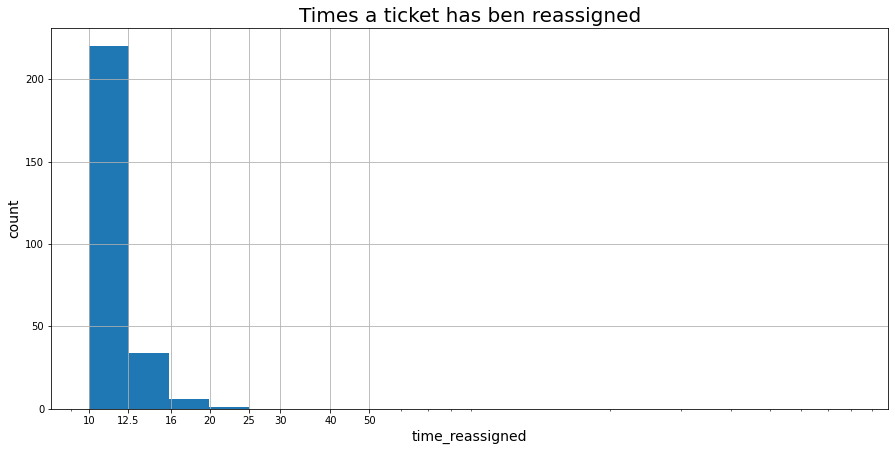

In [15]:
graph_labels('time_reassigned','count',"Times a ticket has ben reassigned")
ticks=[10,12.5,16,20,25,30,40,50]
bins= 10**np.arange(1,3,0.1)
plot_hist_log('counts',ticks,bins,time_reassigned)


In [16]:
time_reassigned['counts'].mean()

3.168910511686226

# 3. Average time that incidents spend with a particular Support group (Assigned_Group).



In [17]:
inc_own['assigned_group'].value_counts()

DC000203    53382
ESI00011    49729
DC000152    42447
NW000417    39619
NW000412    37957
            ...  
AP000005        1
NW000470        1
AP000003        1
NDS00010        1
PM000620        1
Name: assigned_group, Length: 587, dtype: int64

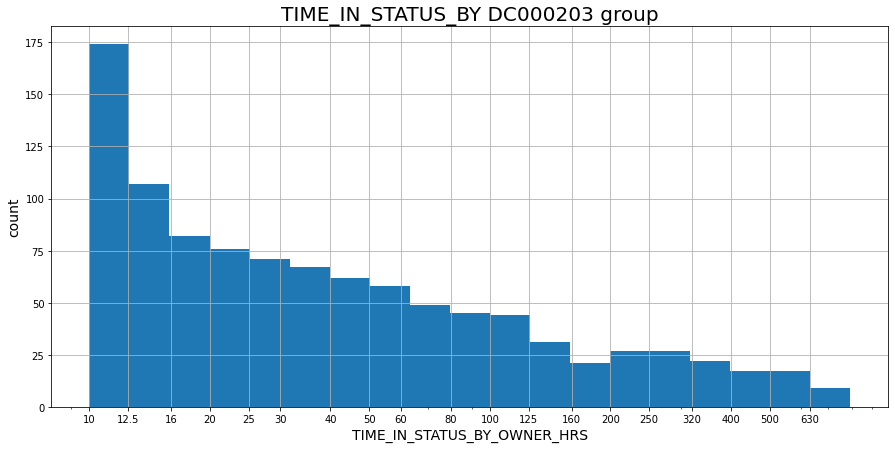

In [18]:
graph_labels('TIME_IN_STATUS_BY_OWNER_HRS','count',"TIME_IN_STATUS_BY DC000203 group")
ticks=[10,12.5,16,20,25,30,40,50,60,80,100,125,160,200,250,320,400,500,630]
bins= 10**np.arange(1,3,0.1)
plot_hist_log('TIME_IN_STATUS_BY_OWNER_HRS',ticks,bins,inc_own[inc_own['assigned_group']=="DC000203"])



In [19]:
inc_own[inc_own['assigned_group']=="DC000203"]['TIME_IN_STATUS_BY_OWNER_HRS'].mean()

4.0326513904615755

# 4. Mean time to restore service (MTRS), are there particular services that are taking longer on average to be restored?

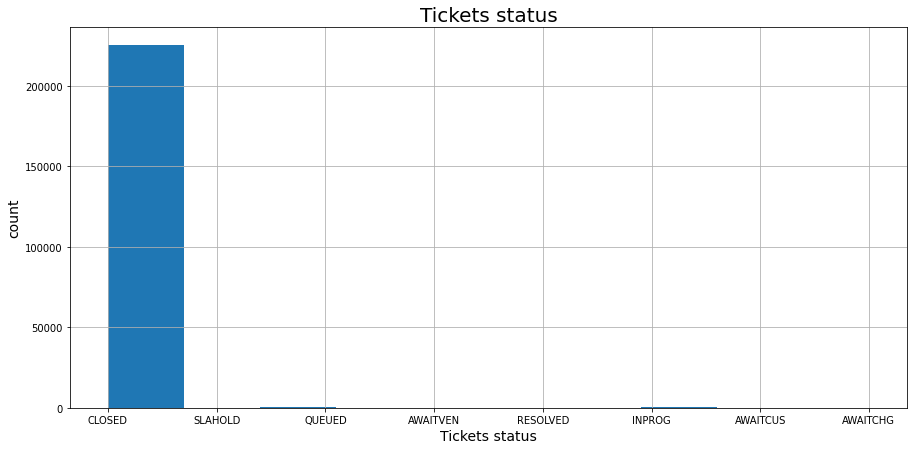

In [20]:
graph_labels('Tickets status','count',"Tickets status")
inc['STATUS'].hist();

## Actaul hours

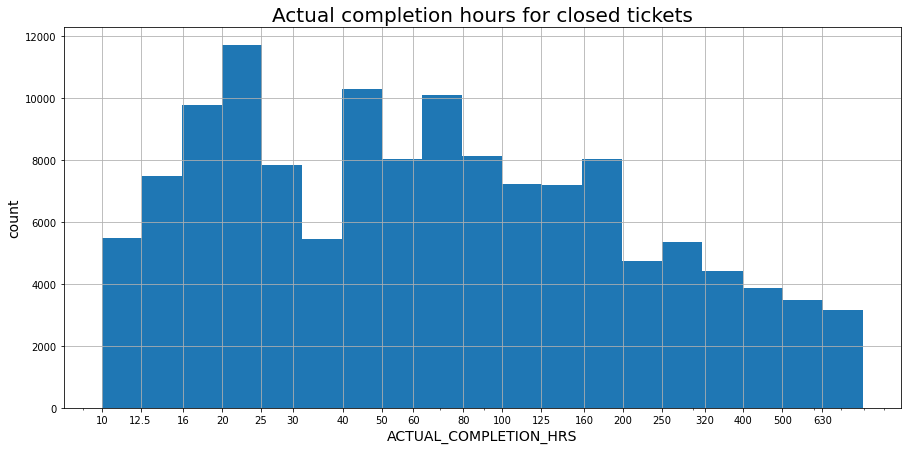

In [21]:
graph_labels('ACTUAL_COMPLETION_HRS','count',"Actual completion hours for closed tickets")
ticks=[10,12.5,16,20,25,30,40,50,60,80,100,125,160,200,250,320,400,500,630]
bins= 10**np.arange(1,3,0.1)
plot_hist_log('ACTUAL_COMPLETION_HRS',ticks,bins,inc[inc['STATUS']=="CLOSED"])


In [22]:
inc[inc['STATUS']=="CLOSED"]['ACTUAL_COMPLETION_HRS'].mean()

263.47101343486446

In [23]:
temp=inc[inc['STATUS']=="CLOSED"]
temp[temp['ACTUAL_COMPLETION_HRS']>263]['service'].value_counts()

Other - Service Management             4079
IBN - GC LAN                           3020
GC WAN                                 2917
Fixed Line                             2406
Midrange - Windows -X86                2396
                                       ... 
IBN - Cabling                             1
IT Continuity Support Service             1
Bulk Print                                1
Solutions Integration Service (SIS)       1
Internet                                  1
Name: service, Length: 62, dtype: int64

## Business Hours

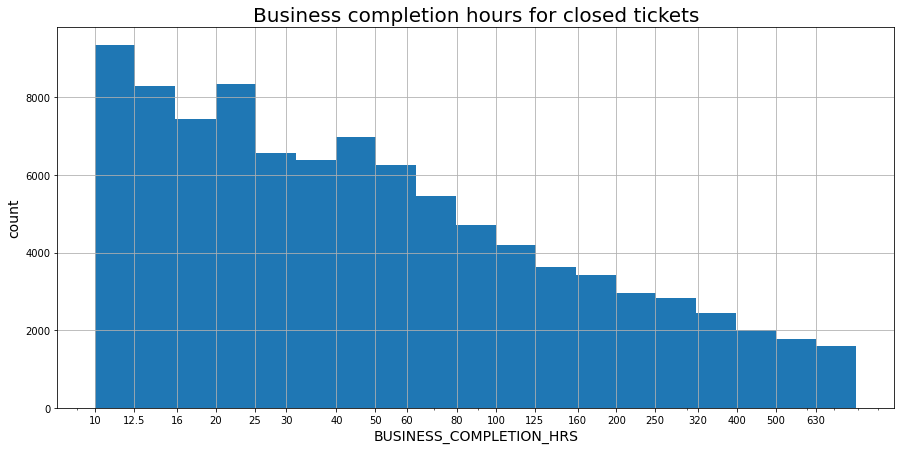

In [24]:
graph_labels('BUSINESS_COMPLETION_HRS','count',"Business completion hours for closed tickets")
ticks=[10,12.5,16,20,25,30,40,50,60,80,100,125,160,200,250,320,400,500,630]
bins= 10**np.arange(1,3,0.1)
plot_hist_log('BUSINESS_COMPLETION_HRS',ticks,bins,inc[inc['STATUS']=="CLOSED"])


In [25]:
inc[inc['STATUS']=="CLOSED"]['BUSINESS_COMPLETION_HRS'].mean()

80.58138262708502

In [26]:
temp[temp['BUSINESS_COMPLETION_HRS']>80]['service'].value_counts()

Other - Service Management             3923
IBN - GC LAN                           2937
GC WAN                                 2823
Midrange - Windows -X86                2250
Fixed Line                             2167
                                       ... 
IBN - Cabling                             1
IT Continuity Support Service             1
Bulk Print                                1
Solutions Integration Service (SIS)       1
Internet                                  1
Name: service, Length: 62, dtype: int64

# 5. Is there a correlation between the number of times an incident is reassigned and how long it takes to restore?

Goups that has reassign number greater than the avg


In [27]:
time_reassigned['counts'].mean()

3.168910511686226

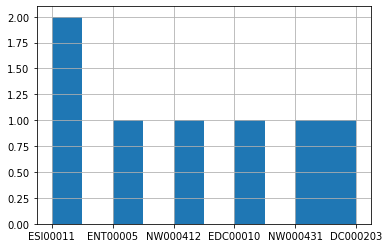

In [28]:

time_reassigned[time_reassigned['counts']>15]['assigned_group'].hist();

In [60]:

inc_own['reassign_times']=[time_reassigned.iloc[i,'counts'] if time_reassigned.iloc[i,'assigned_group'] == inc_own['assigned_group'] ]

SyntaxError: ignored

# 6. Are there particular organizations for whom it takes longer on average to restore services?

## Actual Hours

In [61]:
inc[inc['STATUS']=="CLOSED"]['ACTUAL_COMPLETION_HRS'].mean()

263.47101343486446

In [63]:
temp=inc[inc['STATUS']=="CLOSED"]
temp[temp['ACTUAL_COMPLETION_HRS']>263]['org_id'].value_counts()

1342.0    8765
1047.0    3875
1062.0    3573
1042.0    1921
1028.0    1915
          ... 
1337.0       1
1182.0       1
1205.0       1
948.0        1
930.0        1
Name: org_id, Length: 64, dtype: int64

## Business Hours

In [67]:
inc[inc['STATUS']=="CLOSED"]['BUSINESS_COMPLETION_HRS'].mean()

80.58138262708502

In [68]:
temp=inc[inc['STATUS']=="CLOSED"]
temp[temp['BUSINESS_COMPLETION_HRS']>80]['org_id'].value_counts()

1342.0    8327
1047.0    3721
1062.0    3408
1042.0    1835
1028.0    1784
          ... 
1337.0       1
1182.0       1
1205.0       1
948.0        1
930.0        1
Name: org_id, Length: 63, dtype: int64

# 7. Is there a correlation to certain groups where tickets stay in a particular status that is resulting in longer times to restore service?

# 8. Is there a correlation to certain services where tickets are not resolved as quickly as other services leading to greater MTRS?

## Actual Hours

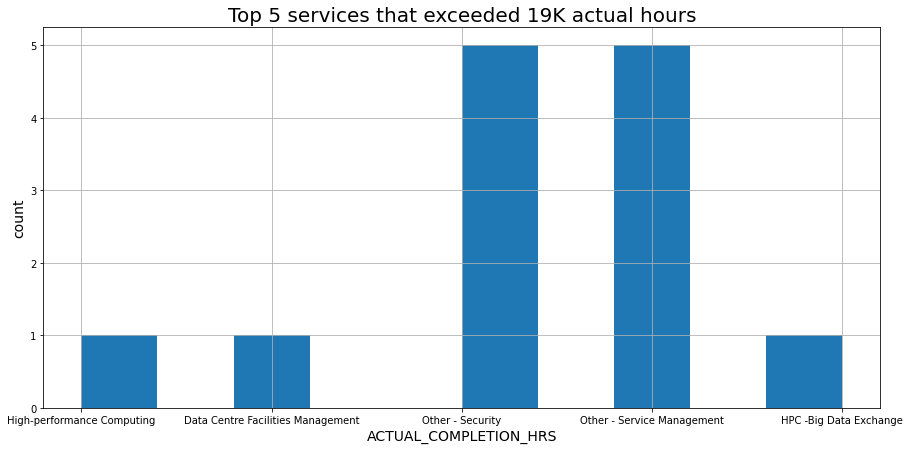

In [97]:
graph_labels('ACTUAL_COMPLETION_HRS','count',"Top 5 services that exceeded 19K actual hours")
temp[temp['ACTUAL_COMPLETION_HRS']>19000]['service'].hist();

## Business hours

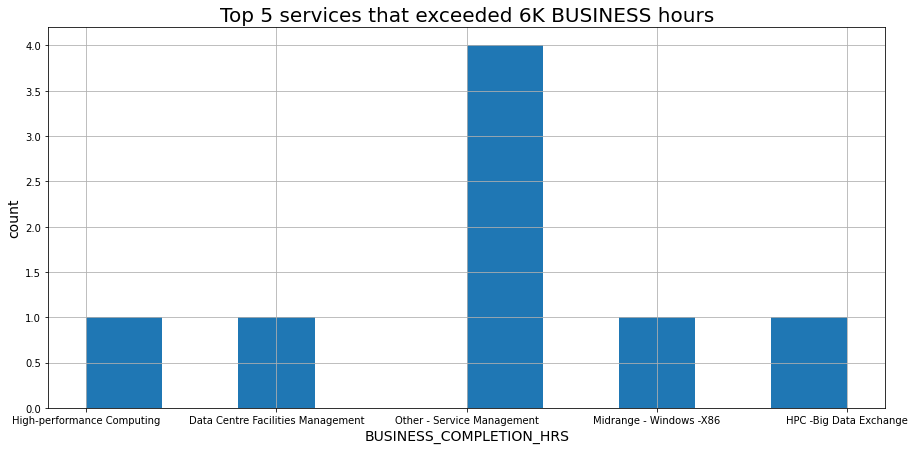

In [95]:
graph_labels('BUSINESS_COMPLETION_HRS','count',"Top 5 services that exceeded 6K BUSINESS hours")

temp[temp['BUSINESS_COMPLETION_HRS']>6300]['service'].hist();

# 9. There are many Event Management tickets. What is the difference in incidents ticket including and excluding Event Management tickets?